# Projeto de conclusão de Módulo Machine Learning II
## Integrantes:
#### Assuero Meira
#### Leandro Republicano
#### Leticia da Luz
#### Orestes Dos Santos
---
## Objetivos do Projeto:
- Com o conhecimento adquirido em análise e ciência de dados até o momento, este projeto tem como finalidade avaliar um dataset sob três perspectivas:
  - **Análise Exploratória de Dados (EDA):** Entender a estrutura, as características e as tendências presentes nos dados.
  - **Análise de Segmentação:** Agrupar os dados em segmentos significativos para identificar padrões e comportamentos específicos.
  - **Análise Preditiva:** Desenvolver um modelo preditivo para antecipar eventos ou comportamentos futuros.

---

## Dataset: Internet Service Provider Customer Churn

**Link:** https://www.kaggle.com/datasets/mehmetsabrikunt/internet-service-churn/data

**Resumo:**
- **Contexto:** Existe uma grande competição entre os provedores de internet. Para aumentar a receita, os provedores precisam de mais assinantes, mas manter os clientes existentes é mais crucial do que conseguir novos. Assim, os provedores querem saber quais clientes têm maior probabilidade de cancelar o serviço, um fenômeno conhecido como churn. Se souberem quem está prestes a cancelar, podem tentar retê-los com promoções ou ofertas especiais.
- **Conteúdo:** Este dataset contém dados de clientes que usam serviços de internet e indica se o cliente cancelou o serviço (churn) ou não.
---
## Desta forma, para este projeto visamos:
- **Previsão de Churn:** Criar um modelo capaz de prever quando um cliente está prestes a cancelar seu serviço.
- **Segmentação de Clientes:** Agrupar clientes que cancelaram o serviço usando técnicas de clusterização. Ao identificar grupos de clientes com características e comportamentos semelhantes, é possível desenvolver estratégias de marketing específicas para reter esses clientes.
---
## 2 - Aprendizado de máquina supervisionado (classificação):

In [2]:
#Importação de bibliotecas
import pandas as pd
import numpy as np

In [3]:
# Montando o Google Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Caminho do arquivo
caminho_csv = '/content/drive/MyDrive/projeto_ML/projeto_ML_2/df_churn_cleaned.csv'

In [5]:
# Carregando o arquivo CSV usando Pandas
df_churn_ML = pd.read_csv(caminho_csv)

In [6]:
df_churn_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71892 entries, 0 to 71891
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tv_subscriber             71892 non-null  int64  
 1   is_movie_package_subscriber  71892 non-null  int64  
 2   subscription_age             71892 non-null  float64
 3   bill_avg                     71892 non-null  int64  
 4   reamining_contract           71892 non-null  float64
 5   service_failure_count        71892 non-null  int64  
 6   download_avg                 71892 non-null  float64
 7   upload_avg                   71892 non-null  float64
 8   download_over_limit          71892 non-null  int64  
 9   churn                        71892 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.5 MB


In [7]:
df_churn_ML.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1


In [8]:
#Importando a função train_test_split para divisão dos dados
from sklearn.model_selection import train_test_split

# Importanto pipeline para encadear múltiplas etapas de processamento
from sklearn.pipeline import Pipeline

#Importando a classe ColumnTransformer para realizar diferentes transformações em conjuntos de dados numéricos e categóricos
from sklearn.compose import ColumnTransformer

# Importando classes necessárias para pré-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Para calcular os pesos das classes
from sklearn.utils.class_weight import compute_class_weight

#Importando estimadores, mudar se for regressão
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Importando a classe StratifiedKFold e a função cross_validate para realizar a validação cruzada
from sklearn.model_selection import StratifiedKFold

#Seleção dos melhores parâmetros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Avaliação do modelo de classificação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Separando as features (x) e a variável alvo(y)
X = df_churn_ML.drop('churn', axis =1)
y = df_churn_ML['churn']

In [10]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Verificando as dimensões
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50324, 9) (50324,) (21568, 9) (21568,)


In [12]:
X_train.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
3067,1,0,5.84,10,0.00,1,0.0,0.0,0
46185,1,1,2.59,15,1.32,0,209.7,15.9,0
55776,1,0,1.44,21,0.47,1,34.4,2.8,0
21856,1,0,0.10,9,0.01,0,0.0,0.0,0
45130,1,0,1.97,21,0.00,2,57.6,6.3,0


In [13]:
X_test.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
54082,1,0,1.67,13,0.30,0,41.6,3.4,0
32197,0,0,4.38,19,1.90,0,23.8,7.6,0
35835,0,0,0.21,14,0.00,0,5.0,0.3,0
61759,1,0,0.91,20,1.07,0,78.2,6.4,0
35715,1,1,4.11,18,1.83,2,120.9,5.4,0


## Vamos remover os outliers apenas nos dados de treino para otimização do modelo, mas o modelo deve ser o suficiente robusto para lidar com outliers nos dados de teste.


In [14]:
X_train[['subscription_age', 'bill_avg', 'download_avg', 'upload_avg']].describe()

,subscription_age,bill_avg,download_avg,upload_avg
count,50324.000000,50324.000000,50324.000000,50324.000000
mean,2.461625,19.019374,43.968693,4.231263
std,2.036373,13.414235,66.267304,10.075744
min,0.000000,0.000000,0.000000,0.000000
25%,0.940000,13.000000,6.700000,0.500000
50%,1.980000,19.000000,27.800000,2.100000
75%,3.320000,22.000000,60.700000,4.900000
max,12.760000,406.000000,4415.200000,453.300000


In [15]:
y_train

3067     1
46185    0
55776    0
21856    1
45130    1
        ..
37194    1
6265     1
54886    0
860      1
15795    1
Name: churn, Length: 50324, dtype: int64

In [16]:
# Combinando X_train e y_train em um único DataFrame para manter as linhas alinhadas
X_train['y_train'] = y_train

In [17]:
X_train.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,y_train
3067,1,0,5.84,10,0.00,1,0.0,0.0,0,1
46185,1,1,2.59,15,1.32,0,209.7,15.9,0,0
55776,1,0,1.44,21,0.47,1,34.4,2.8,0,0
21856,1,0,0.10,9,0.01,0,0.0,0.0,0,1
45130,1,0,1.97,21,0.00,2,57.6,6.3,0,1


In [18]:
# Lista de colunas que vamos remover os outliers
columns_to_clean = ['subscription_age', 'bill_avg', 'download_avg', 'upload_avg']

In [19]:
def remove_outliers(df, columns):
  for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df


In [20]:
X_train_cleaned = remove_outliers(X_train, columns_to_clean)

In [21]:
X_train_cleaned[['subscription_age', 'bill_avg', 'download_avg', 'upload_avg']].describe()

,subscription_age,bill_avg,download_avg,upload_avg
count,41711.000000,41711.000000,41711.000000,41711.000000
mean,2.196146,16.881302,30.457424,2.323898
std,1.667380,7.569480,30.337849,2.321852
min,0.000000,0.000000,0.000000,0.000000
25%,0.900000,13.000000,4.500000,0.400000
50%,1.950000,18.000000,22.000000,1.600000
75%,3.040000,22.000000,47.400000,3.700000
max,6.890000,35.000000,133.200000,9.600000


In [22]:
# Separar X_train e y_train novamente
y_train_cleaned = X_train_cleaned['y_train']
X_train_cleaned = X_train_cleaned.drop('y_train', axis = 1)

In [23]:
print(X_train_cleaned.shape,y_train_cleaned.shape)

(41711, 9) (41711,)


In [24]:
X_train_cleaned.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
3067,1,0,5.84,10,0.00,1,0.0,0.0,0
55776,1,0,1.44,21,0.47,1,34.4,2.8,0
21856,1,0,0.10,9,0.01,0,0.0,0.0,0
45130,1,0,1.97,21,0.00,2,57.6,6.3,0
3701,0,0,5.72,18,0.00,0,0.0,0.0,0


In [25]:
y_train_cleaned

3067     1
55776    0
21856    1
45130    1
3701     1
        ..
37194    1
6265     1
54886    0
860      1
15795    1
Name: y_train, Length: 41711, dtype: int64

In [26]:
#Lidando com o desbalanceamento dos dados
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))
weights_dict

{0: 1.1232032854209446, 1: 0.9011532125205931}

## Métrica (Recall)
- No desenvolvimento de um modelo preditivo de churn, a escolha das métricas de desempenho é crucial para garantir que o modelo atenda aos objetivos do negócio. Neste projeto, a métrica de recall foi escolhida como a principal métrica de otimização.
- Em um cenário de churn, um falso negativo ocorre quando o modelo falha em identificar um cliente que realmente vai cancelar o serviço. Isso é crítico porque a empresa perde a oportunidade de reter esses clientes. **Ao otimizar o recall, garantimos que estamos minimizando a quantidade de falsos negativos, ou seja, estamos identificando o maior número possível de clientes em risco de churn.**

## Pipeline KNN com StandardScaler

### Hiperparâmetros
- classifier__n_neighbors:especifica o número de vizinhos a serem considerados pelo algoritmo.
- classifier__weights: Define como os vizinhos são ponderados ao votar para a classificação de um ponto.
- classifier__algorithm: Especifica o algoritmo usado para calcular os vizinhos mais próximos
  - 'ball_tree' é um algoritmo eficiente para grandes conjuntos de dados com muitas dimensões.
- classifier__metric: define a métrica de distância usada para calcular a proximidade entre pontos

In [ ]:
# Identificando suas colunas numéricas
numeric_features = ['subscription_age', 'bill_avg', 'service_failure_count', 'download_avg',	'upload_avg', 'download_over_limit',
                    'reamining_contract']

# Lista de colunas que não serão transformadas
unchanged_features = ['is_tv_subscriber', 'is_movie_package_subscriber']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('passthrough', 'passthrough', unchanged_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parâmetros para o RandomSearch
param_distributions = {
    'classifier__n_neighbors': range(3, 15),
    'classifier__weights': ['distance', 'uniform'],
    'classifier__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'classifier__metric': ["manhattan", "euclidean", "minkowski"],
}

#RandomSearch
random_search = RandomizedSearchCV(pipeline, param_distributions, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o RandomizedSearchCV
random_search.fit(X_train_cleaned, y_train_cleaned)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['subscription_age',
                                                                                'bill_avg',
                                                                                'service_failure_count',
                                                                                'download_avg',
                                                                                'upload_avg',
                                                                                'download_over_limit',
                                                                                'reamining_contract']),
                                                                              ('passthrough',...
                                                                               ['is_tv_subscriber',
                                                                                'is_movie_package_subscriber'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   param_distributions={'classifier__algorithm': ['ball_tree',
                                                                  'kd_tree',
                                                                  'brute'],
                                        'classifier__metric': ['manhattan',
                                                               'euclidean',
                                                               'minkowski'],
                                        'classifier__n_neighbors': range(3, 15),
                                        'classifier__weights': ['distance',
                                                                'uniform']},
                   return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {random_search.best_params_}')
print(f'Melhor score de validação cruzada: {random_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__weights': 'uniform', 'classifier__n_neighbors': 12, 'classifier__metric': 'manhattan', 'classifier__algorithm': 'kd_tree'}
Melhor score de validação cruzada: 0.916


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo RandomSearch
y_pred_test = random_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.9062
Precisão: 0.9042
Recall: 0.9059
F1-score: 0.9050


## KNN com Normalização (Min-Max Scaling):

In [ ]:
# Identificando suas colunas numéricas
numeric_features = ['subscription_age', 'bill_avg', 'service_failure_count', 'download_avg',	'upload_avg', 'download_over_limit',
                    'reamining_contract']

# Lista de colunas que não serão transformadas
unchanged_features = ['is_tv_subscriber', 'is_movie_package_subscriber']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('min_max_scaler', MinMaxScaler())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('passthrough', 'passthrough', unchanged_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parâmetros para o RandomSearch
param_distributions = {
    'classifier__n_neighbors': range(3, 15),
    'classifier__weights': ['distance'],
    'classifier__algorithm': ['ball_tree'],
    'classifier__metric': ["manhattan", "euclidean", "minkowski"],
}

#RandomSearch
random_search = RandomizedSearchCV(pipeline, param_distributions, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o RandomizedSearchCV
random_search.fit(X_train_cleaned, y_train_cleaned)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('min_max_scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['subscription_age',
                                                                                'bill_avg',
                                                                                'service_failure_count',
                                                                                'download_avg',
                                                                                'upload_avg',
                                                                                'download_over_limit',
                                                                                'reamining_contract']),
                                                                              ('passthr...',
                                                                               'passthrough',
                                                                               ['is_tv_subscriber',
                                                                                'is_movie_package_subscriber'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   param_distributions={'classifier__algorithm': ['ball_tree'],
                                        'classifier__metric': ['manhattan',
                                                               'euclidean',
                                                               'minkowski'],
                                        'classifier__n_neighbors': range(3, 15),
                                        'classifier__weights': ['distance']},
                   return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {random_search.best_params_}')
print(f'Melhor score de validação cruzada: {random_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__weights': 'distance', 'classifier__n_neighbors': 8, 'classifier__metric': 'manhattan', 'classifier__algorithm': 'ball_tree'}
Melhor score de validação cruzada: 0.919


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo RandomSearch
y_pred_test = random_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.9080
Precisão: 0.9061
Recall: 0.9073
F1-score: 0.9067


## Xgboost
- Baseado em árvores de decisão, não é necessário escalonar.

### Hiperparâmetros
- classifier__n_estimators:número de árvores
- classifier__max_depth: profundidade máxima de cada árvore
- classifier__learning_rate: taxa de aprendizado
- classifier__subsample: fração de amostras usadas para treinar cada árvore
- classifier__colsample_bytree:  especifica a fração de colunas (features) a serem amostradas aleatoriamente para cada árvore

In [28]:
# Atribuindo pesos as amostras
scale_pos_weight = weights_dict[0] / weights_dict[1]
scale_pos_weight

1.2464065708418892

**Um scale_pos_weight maior que 1 (1.246 neste caso) sugere que a classe negativa (0) é menos frequente que a classe positiva (1). Quando o valor de scale_pos_weight é maior que 1, isso significa que estamos dando mais importância às amostras da classe minoritária (neste caso, a classe negativa 0). Isso ajuda o modelo a lidar melhor com o desbalanceamento, aumentando a penalidade para erros na classe minoritária, o que força o modelo a prestar mais atenção a essas amostras.**

In [29]:
# Lista de colunas que não serão transformadas
unchanged_features = ['is_tv_subscriber', 'is_movie_package_subscriber',
                      'subscription_age', 'bill_avg', 'service_failure_count',
                      'download_avg', 'upload_avg', 'download_over_limit', 'reamining_contract']

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('passthrough', 'passthrough', unchanged_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parâmetros para o RandomSearch
param_distributions = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': range(3, 10),
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
}

# RandomSearch
random_search = RandomizedSearchCV(pipeline, param_distributions, cv=SF, scoring='recall_macro', return_train_score=True, n_iter=50, random_state=42)

In [30]:
# Executando o RandomizedSearchCV
random_search.fit(X_train_cleaned, y_train_cleaned)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('passthrough',
                                                                               'passthrough',
                                                                               ['is_tv_subscriber',
                                                                                'is_movie_package_subscriber',
                                                                                'subscription_age',
                                                                                'bill_avg',
                                                                                'service_failure_count',
                                                                                'download_avg',
                                                                                'upload_avg',
                                                                                'download_over_limit',
                                                                                'reamining_co...
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...))]),
                   n_iter=50,
                   param_distributions={'classifier__colsample_bytree': [0.6,
                                                                         0.8,
                                                                         1.0],
                                        'classifier__learning_rate': [0.01, 0.1,
                                                                      0.2],
                                        'classifier__max_depth': range(3, 10),
                                        'classifier__n_estimators': [100, 200,
                                                                     300],
                                        'classifier__subsample': [0.6, 0.8,
                                                                  1.0]},
                   random_state=42, return_train_score=True,
                   scoring='recall_macro')

In [31]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {random_search.best_params_}')
print(f'Melhor score de validação cruzada: {random_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__subsample': 0.8, 'classifier__n_estimators': 100, 'classifier__max_depth': 8, 'classifier__learning_rate': 0.1, 'classifier__colsample_bytree': 0.6}
Melhor score de validação cruzada: 0.948


In [32]:
# Fazendo previsões com o melhor modelo encontrado pelo RandomSearch
y_pred_test = random_search.predict(X_test)

In [33]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.9426
Precisão: 0.9412
Recall: 0.9425
F1-score: 0.9418


##SVC
### Kernel Linear
  - **Além do balanceamento das classes, para o Kernel Linear só temos o  parâmetro de regularização C.**
- Vamos utilizar o Min-Max Scaling que otimizou nosso modelo.


In [ ]:
# Identificando suas colunas numéricas
numeric_features = ['subscription_age', 'bill_avg', 'service_failure_count', 'download_avg',	'upload_avg', 'download_over_limit',
                    'reamining_contract']

# Lista de colunas que não serão transformadas
unchanged_features = ['is_tv_subscriber', 'is_movie_package_subscriber']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('min_max_scaler', MinMaxScaler())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('passthrough', 'passthrough', unchanged_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Parâmetros para o RandomSearch focado no kernel linear
param_distributions = {
    'classifier__C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'classifier__kernel': ['linear']
}

# Configuração do RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=4, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o RandomizedSearchCV
random_search.fit(X_train_cleaned, y_train_cleaned)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('min_max_scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['subscription_age',
                                                                                'bill_avg',
                                                                                'service_failure_count',
                                                                                'download_avg',
                                                                                'upload_avg',
                                                                                'download_over_limit',
                                                                                'reamining_contract']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['is_tv_subscriber',
                                                                                'is_movie_package_subscriber'])])),
                                             ('classifier',
                                              SVC(class_weight={0: 1.1232032854209446,
                                                                1: 0.9011532125205931}))]),
                   n_iter=4,
                   param_distributions={'classifier__C': [0.1, 1, 10, 100],
                                        'classifier__kernel': ['linear']},
                   return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {random_search.best_params_}')
print(f'Melhor score de validação cruzada: {random_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__kernel': 'linear', 'classifier__C': 100}
Melhor score de validação cruzada: 0.879


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo RandomSearch
y_pred_test = random_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.8770
Precisão: 0.8763
Recall: 0.8732
F1-score: 0.8746


##SVC
### Kernel RBF

In [ ]:

# Identificando suas colunas numéricas
numeric_features = ['subscription_age', 'bill_avg', 'service_failure_count', 'download_avg', 'upload_avg', 'download_over_limit',
                    'reamining_contract']

# Lista de colunas que não serão transformadas
unchanged_features = ['is_tv_subscriber', 'is_movie_package_subscriber']

# Criando um pipeline para processamento de características numéricas
numerical_transformer = Pipeline(steps=[
    ('min_max_scaler', MinMaxScaler())
])

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('passthrough', 'passthrough', unchanged_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight=weights_dict))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Parâmetros para o RandomSearch focado nos kernels linear e RBF
param_distributions = {
    'classifier__C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'classifier__kernel': ['rbf'],  # Adicionando o kernel rbf
    'classifier__gamma': [ 0.001, 0.01, 0.1, 1]  # Parâmetro gamma para o kernel rbf
}

# Configuração do RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions, cv=SF, scoring='recall_macro', return_train_score=True)

In [ ]:
# Executando o RandomizedSearchCV
random_search.fit(X_train_cleaned, y_train_cleaned)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('min_max_scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['subscription_age',
                                                                                'bill_avg',
                                                                                'service_failure_count',
                                                                                'download_avg',
                                                                                'upload_avg',
                                                                                'download_over_limit',
                                                                                'reamining_contract']),
                                                                              ('passthrough',
                                                                               'passthrough',
                                                                               ['is_tv_subscriber',
                                                                                'is_movie_package_subscriber'])])),
                                             ('classifier',
                                              SVC(class_weight={0: 1.1232032854209446,
                                                                1: 0.9011532125205931}))]),
                   param_distributions={'classifier__C': [0.1, 1, 10, 100],
                                        'classifier__gamma': [0.001, 0.01, 0.1,
                                                              1],
                                        'classifier__kernel': ['rbf']},
                   return_train_score=True, scoring='recall_macro')

In [ ]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {random_search.best_params_}')
print(f'Melhor score de validação cruzada: {random_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__kernel': 'rbf', 'classifier__gamma': 1, 'classifier__C': 100}
Melhor score de validação cruzada: 0.925


In [ ]:
# Fazendo previsões com o melhor modelo encontrado pelo RandomSearch
y_pred_test = random_search.predict(X_test)

In [ ]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.8911
Precisão: 0.8923
Recall: 0.8861
F1-score: 0.8886


## Otimizando o melhor modelo: Xgboost


In [34]:
# Lista de colunas que não serão transformadas
unchanged_features = ['is_tv_subscriber', 'is_movie_package_subscriber',
                      'subscription_age', 'bill_avg', 'service_failure_count',
                      'download_avg', 'upload_avg', 'download_over_limit', 'reamining_contract']

# Criando um transformador de colunas com transformações apropriadas para cada tipo de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('passthrough', 'passthrough', unchanged_features)
    ])

# Criando o pipeline completo com o pré-processador e o classificador
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight))
])

# Configuração do StratifiedKFold para a validação cruzada
SF = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Parâmetros para o GridSearch
param_grid = {
    'classifier__n_estimators': [100,150],
    'classifier__max_depth': [8],
    'classifier__learning_rate': [0.05, 0.1, 0.15],
    'classifier__subsample': [0.8, 0.9],
    'classifier__colsample_bytree': [0.5, 0.6],
}

# GridSearch
grid_search = GridSearchCV(pipeline, param_grid, cv=SF, scoring='recall_macro', return_train_score=True)

In [35]:
# Executando o GridSearch
grid_search.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('passthrough',
                                                                         'passthrough',
                                                                         ['is_tv_subscriber',
                                                                          'is_movie_package_subscriber',
                                                                          'subscription_age',
                                                                          'bill_avg',
                                                                          'service_failure_count',
                                                                          'download_avg',
                                                                          'upload_avg',
                                                                          'download_over_limit',
                                                                          'reamining_contract...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__colsample_bytree': [0.5, 0.6],
                         'classifier__learning_rate': [0.05, 0.1, 0.15],
                         'classifier__max_depth': [8],
                         'classifier__n_estimators': [100, 150],
                         'classifier__subsample': [0.8, 0.9]},
             return_train_score=True, scoring='recall_macro')

In [36]:
# Imprimindo os melhores parâmetros e o melhor score
print(f'Melhores Parâmetros: {grid_search.best_params_}')
print(f'Melhor score de validação cruzada: {grid_search.best_score_:.3f}')

Melhores Parâmetros: {'classifier__colsample_bytree': 0.6, 'classifier__learning_rate': 0.15, 'classifier__max_depth': 8, 'classifier__n_estimators': 100, 'classifier__subsample': 0.9}
Melhor score de validação cruzada: 0.948


In [37]:
# Fazendo previsões com o melhor modelo encontrado pelo GridSearch
y_pred_test = grid_search.predict(X_test)

In [38]:
# Calculando métricas individuais
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
f1 = f1_score(y_test, y_pred_test, average='macro')

# Imprimindo métricas
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Acurácia: 0.9441
Precisão: 0.9428
Recall: 0.9439
F1-score: 0.9433


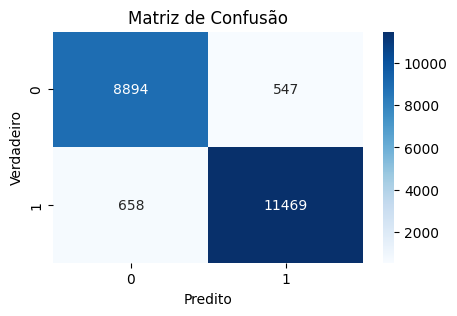

In [39]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Plotando a matriz de confusão com Seaborn
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.show()

In [40]:
# Calculando as probabilidades previstas para a classe positiva
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]

In [41]:
# Calculando a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

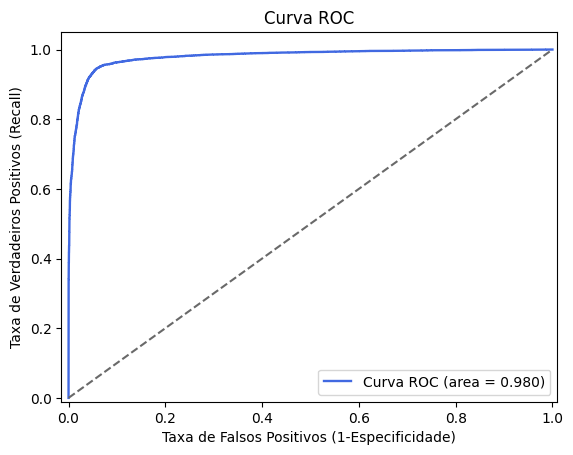

In [42]:
# Plotando a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#4169E1', lw=1.7, label='Curva ROC (area = %0.3f)' % auc)
plt.plot([0, 1], [0, 1], color='#696969', lw=1.5, linestyle='--')
plt.xlim([-0.015, 1.01])
plt.ylim([-0.011, 1.05])
plt.xlabel('Taxa de Falsos Positivos (1-Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### Interpretação do Gráfico
- Eixo X (Taxa de Falsos Positivos - FPR): Representa a proporção de negativos que foram incorretamente classificados como positivos. Também é conhecido como 1-Especificidade. O FPR é calculado como FP/(FP + TN).
  - Uma FPR baixa significa que o modelo comete poucos erros ao classificar amostras negativas como positivas
- Eixo Y (Taxa de Verdadeiros Positivos - TPR): Representa a proporção de positivos que foram corretamente classificados como positivos. Também é conhecido como Sensibilidade ou Recall.
  - Uma TPR alta significa que o modelo é bom em identificar amostras positivas corretamente.
- **A linha azul no gráfico é a curva ROC do modelo. Quanto mais a curva se aproxima do canto superior esquerdo do gráfico, melhor é o desempenho do modelo. Uma curva que se aproxima do ponto (0,1) significa que o modelo tem uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos.**
---
## Conclusões
- Em um mercado competitivo, como o de provedores de serviços de internet, a retenção de clientes é uma tarefa crucial. O modelo de churn desenvolvido visa identificar clientes com alta probabilidade de cancelar o serviço, permitindo que a empresa tome medidas proativas para reter esses clientes.
- Por exemplo, oferecendo promoções personalizadas ou melhorando o atendimento ao cliente. Otimizar o recall maximiza a capacidade de identificar esses clientes, aumentando a eficácia das ações de retenção.
- Nosso modelo atingiu um recall de cerca de 0.94. A matriz de confusão mostra os seguintes resultados:
  - Verdadeiros Negativos (0,0): 8951
  - Falsos Positivos (0,1): 490
  - Falsos Negativos (1,0): 732
  - Verdadeiros Positivos (1,1): 11395
- A Curva ROC (Receiver Operating Characteristic) apresenta uma Área Sob a Curva (AUC) de aproximadamente 0.98, indicando que o modelo tem uma excelente capacidade de discriminar entre clientes que irão cancelar (churn) e os que não irão.
- Exemplo de aplicabilidade e Produção
  - O modelo pode ser integrado com sistemas de CRM (Customer Relationship Management) existentes para fornecer alertas em tempo real sobre clientes em risco de churn. Isso permite que a equipe de marketing ou atendimento ao cliente tome medidas imediatas, como oferecer promoções ou descontos personalizados para esses clientes.